# Comcast Telecom Consumer Complaints

### Hrishikesh Ramekar

## Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plot 
import seaborn as sns 
%matplotlib inline 

In [6]:
df=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [7]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [8]:
print(df.isnull().sum())

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64


#### There are no Nan Values present in the dataset 

In [9]:
df.describe(include='all')

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,260733,Comcast,24-06-15,24-Jun-15,10:18:11 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [10]:
df.shape

(2224, 11)

In [13]:
df=df.drop(['Ticket #','Time'],axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer Complaint           2224 non-null   object
 1   Date                         2224 non-null   object
 2   Date_month_year              2224 non-null   object
 3   Received Via                 2224 non-null   object
 4   City                         2224 non-null   object
 5   State                        2224 non-null   object
 6   Zip code                     2224 non-null   int64 
 7   Status                       2224 non-null   object
 8   Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(8)
memory usage: 156.5+ KB


In [16]:
print(df.columns.tolist())

['Customer Complaint', 'Date', 'Date_month_year', 'Received Via', 'City', 'State', 'Zip code', 'Status', 'Filing on Behalf of Someone']


## 1.trend chart for the number of complaints at monthly and daily granularity levels

In [17]:
df['Date_month_year']=df['Date_month_year'].apply(pd.to_datetime)
df=df.set_index('Date_month_year')

Text(0.5, 1.0, 'Monthly Trend Report')

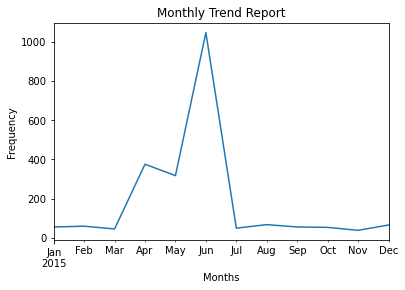

In [21]:
import matplotlib.pyplot as plt 
months = df.groupby(pd.Grouper(freq="M")).size().plot()
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.title("Monthly Trend Report")

### It can be seen that complaints from June 2015 are maximum

In [22]:
df['Date'].value_counts(dropna=False)[:8]

24-06-15    218
23-06-15    190
25-06-15     98
26-06-15     55
30-06-15     53
29-06-15     51
18-06-15     47
06-12-15     43
Name: Date, dtype: int64

Text(0.5, 1.0, 'Daily Trend Chart')

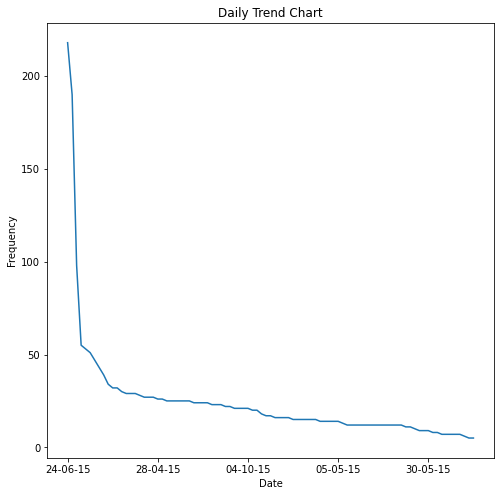

In [23]:
df=df.sort_values(by='Date')
plt.figure(figsize=(8,8))
df['Date'].value_counts().plot()
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Daily Trend Chart")

   ## 2.Provide a table with the frequency of complaint types

In [24]:
df['Customer Complaint'].value_counts(dropna=False)

Comcast                                                                         83
Comcast Internet                                                                18
Comcast Data Cap                                                                17
comcast                                                                         13
Data Caps                                                                       11
                                                                                ..
credit for service outage 6/23/15                                                1
Comcast lied to me                                                               1
Comcast Xfinity Charges Consumer for Troubleshooting/Fixing its Own Problems     1
Prolonged internet outage, tardy response                                        1
Billing and false advertising                                                    1
Name: Customer Complaint, Length: 1841, dtype: int64

<AxesSubplot:>

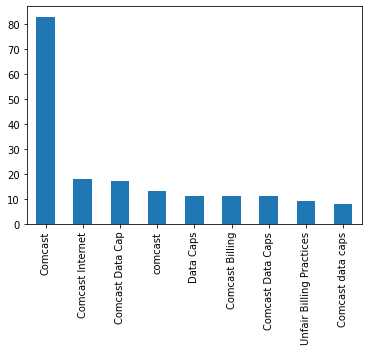

In [25]:
df['Customer Complaint'].value_counts(dropna=False)[:9].plot.bar()

## 3.Which complaint types are maximum i.e., around internet, network issues, or across any other domains

In [26]:
internet_issues1=df[df['Customer Complaint'].str.contains("network")].count()

In [27]:
internet_issues2=df[df['Customer Complaint'].str.contains("speed")].count()

In [28]:
internet_issues3=df[df['Customer Complaint'].str.contains("data")].count()

In [29]:
internet_issues4=df[df['Customer Complaint'].str.contains("internet")].count()

In [30]:
billing_issues1=df[df['Customer Complaint'].str.contains("bill")].count()

In [31]:
billing_issues2=df[df['Customer Complaint'].str.contains("billing")].count()

In [32]:
billing_issues3=df[df['Customer Complaint'].str.contains("charges")].count()

In [33]:
service_issues1=df[df['Customer Complaint'].str.contains("service")].count()

In [34]:
service_issues2=df[df['Customer Complaint'].str.contains("customer")].count()

In [35]:
total_internet_issues=internet_issues1 + internet_issues2 + internet_issues3+ internet_issues4
print(total_internet_issues)

Customer Complaint             374
Date                           374
Received Via                   374
City                           374
State                          374
Zip code                       374
Status                         374
Filing on Behalf of Someone    374
dtype: int64


In [36]:
total_billing_issues=billing_issues1 + billing_issues2 + billing_issues3
print(total_billing_issues)

Customer Complaint             353
Date                           353
Received Via                   353
City                           353
State                          353
Zip code                       353
Status                         353
Filing on Behalf of Someone    353
dtype: int64


In [37]:
total_service_issues=service_issues1 + service_issues2
print(total_service_issues)

Customer Complaint             360
Date                           360
Received Via                   360
City                           360
State                          360
Zip code                       360
Status                         360
Filing on Behalf of Someone    360
dtype: int64


In [38]:
other_issues=2224-(total_internet_issues + total_billing_issues + total_service_issues)
print(other_issues)

Customer Complaint             1137
Date                           1137
Received Via                   1137
City                           1137
State                          1137
Zip code                       1137
Status                         1137
Filing on Behalf of Someone    1137
dtype: int64


### From above analysis we can see other issues are Maximum

## 4.Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [39]:
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [40]:
df['newStatus']=["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]

In [41]:
df.head()

,Customer Complaint,Date,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,newStatus
Date_month_year,,,,,,,,,
2015-01-04,Fraudulent claims reported to collections agency,04-01-15,Customer Care Call,Atlanta,Georgia,30312,Closed,No,Closed
2015-01-04,Comcast refusal of service,04-01-15,Customer Care Call,Wayne,Pennsylvania,19087,Closed,No,Closed
2015-01-04,Comcast Cable,04-01-15,Internet,Franklin,Tennessee,37067,Closed,No,Closed
2015-01-04,Data Overages,04-01-15,Internet,Savannah,Georgia,31406,Closed,No,Closed
2015-01-04,Comcast,04-01-15,Internet,North Huntingdon,Pennsylvania,15642,Closed,No,Closed


In [42]:
df=df.drop(['Status'],axis=1)
df

,Customer Complaint,Date,Received Via,City,State,Zip code,Filing on Behalf of Someone,newStatus
Date_month_year,,,,,,,,
2015-01-04,Fraudulent claims reported to collections agency,04-01-15,Customer Care Call,Atlanta,Georgia,30312,No,Closed
2015-01-04,Comcast refusal of service,04-01-15,Customer Care Call,Wayne,Pennsylvania,19087,No,Closed
2015-01-04,Comcast Cable,04-01-15,Internet,Franklin,Tennessee,37067,No,Closed
2015-01-04,Data Overages,04-01-15,Internet,Savannah,Georgia,31406,No,Closed
2015-01-04,Comcast,04-01-15,Internet,North Huntingdon,Pennsylvania,15642,No,Closed
...,...,...,...,...,...,...,...,...
2015-05-31,Comcast,31-05-15,Customer Care Call,Beaverton,Oregon,97006,No,Open
2015-05-31,Comcast of East Windsor NJ Complaint,31-05-15,Internet,East Windsor,New Jersey,8520,No,Open
2015-05-31,n/a (b) (6),31-05-15,Internet,Loganville,Georgia,30052,No,Open


## 5.Which state has the maximum complaints

In [43]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)[:5]

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


### Georgia has the maximum number of complaints 

## 6.provide state wise status of complaints in a stacked barchart

In [44]:
Status_complaints=df.groupby(["State","newStatus"]).size().unstack()

In [45]:
print(Status_complaints)

newStatus             Closed  Open
State                             
Alabama                 17.0   9.0
Arizona                 14.0   6.0
Arkansas                 6.0   NaN
California             159.0  61.0
Colorado                58.0  22.0
Connecticut              9.0   3.0
Delaware                 8.0   4.0
District Of Columbia    14.0   2.0
District of Columbia     1.0   NaN
Florida                201.0  39.0
Georgia                208.0  80.0
Illinois               135.0  29.0
Indiana                 50.0   9.0
Iowa                     1.0   NaN
Kansas                   1.0   1.0
Kentucky                 4.0   3.0
Louisiana               12.0   1.0
Maine                    3.0   2.0
Maryland                63.0  15.0
Massachusetts           50.0  11.0
Michigan                92.0  23.0
Minnesota               29.0   4.0
Mississippi             23.0  16.0
Missouri                 3.0   1.0
Montana                  1.0   NaN
Nevada                   1.0   NaN
New Hampshire       

<AxesSubplot:xlabel='State'>

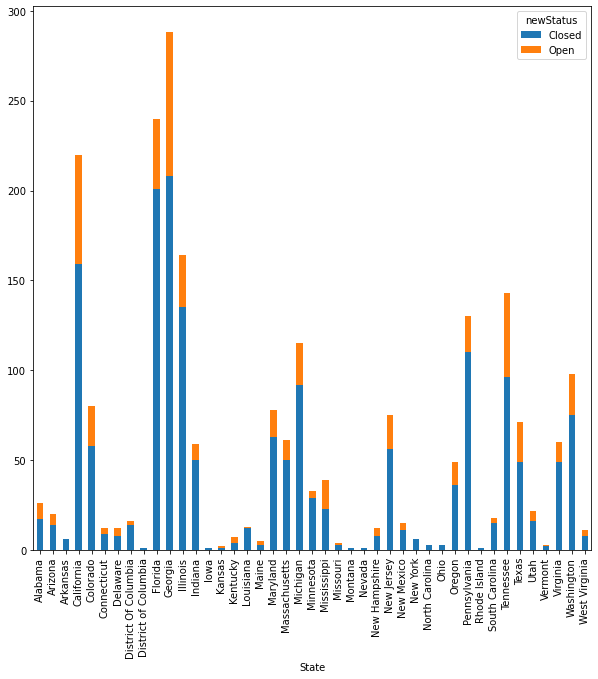

In [48]:
Status_complaints.plot.bar(figsize=(10,10),stacked = True)

In [50]:
print(df['newStatus'].value_counts())

Closed    1707
Open       517
Name: newStatus, dtype: int64


## 7.Which state has the highest percentage of unresolved complaints

newStatus             Closed  Open  unresolved_cmp_prct
State                                                  
Georgia                208.0  80.0            15.473888
California             159.0  61.0            11.798839
Tennessee               96.0  47.0             9.090909
Florida                201.0  39.0             7.543520
Illinois               135.0  29.0             5.609284
Washington              75.0  23.0             4.448743
Michigan                92.0  23.0             4.448743
Colorado                58.0  22.0             4.255319
Texas                   49.0  22.0             4.255319
Pennsylvania           110.0  20.0             3.868472
New Jersey              56.0  19.0             3.675048
Mississippi             23.0  16.0             3.094778
Maryland                63.0  15.0             2.901354
Oregon                  36.0  13.0             2.514507
Virginia                49.0  11.0             2.127660
Massachusetts           50.0  11.0             2

<AxesSubplot:xlabel='State'>

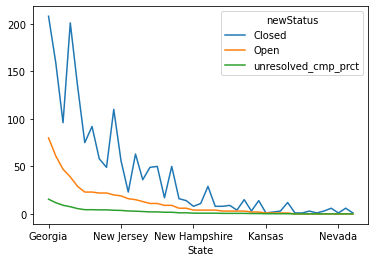

In [56]:
unresolved_data=df.groupby(["State",'newStatus']).size().unstack().fillna(0).sort_values(by ='Open',ascending =False)
unresolved_data['unresolved_cmp_prct']=unresolved_data['Open']/unresolved_data['Open'].sum()*100
print(unresolved_data)
unresolved_data.plot()

### From above it can be concluded that georgia has highest percentage of unresolved complaints.

## 8.Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [57]:
resolved_data =df.groupby(['Received Via','newStatus']).size().unstack().fillna(0)
resolved_data['resolved']=resolved_data['Closed']/resolved_data['Closed'].sum()*100
resolved_data['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64

<AxesSubplot:xlabel='Received Via'>

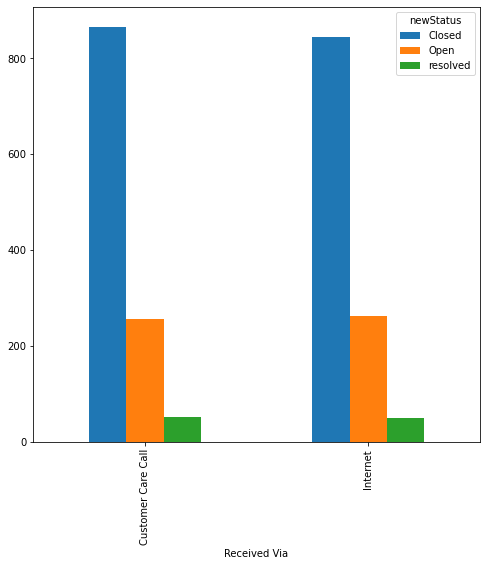

In [58]:
resolved_data.plot(kind="bar",figsize=(8,8))